In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from routines import ReadCOSMOthermGamma


T = 303.15
param_str = 'TZVP'
hbd_str = 'pfpa_1'

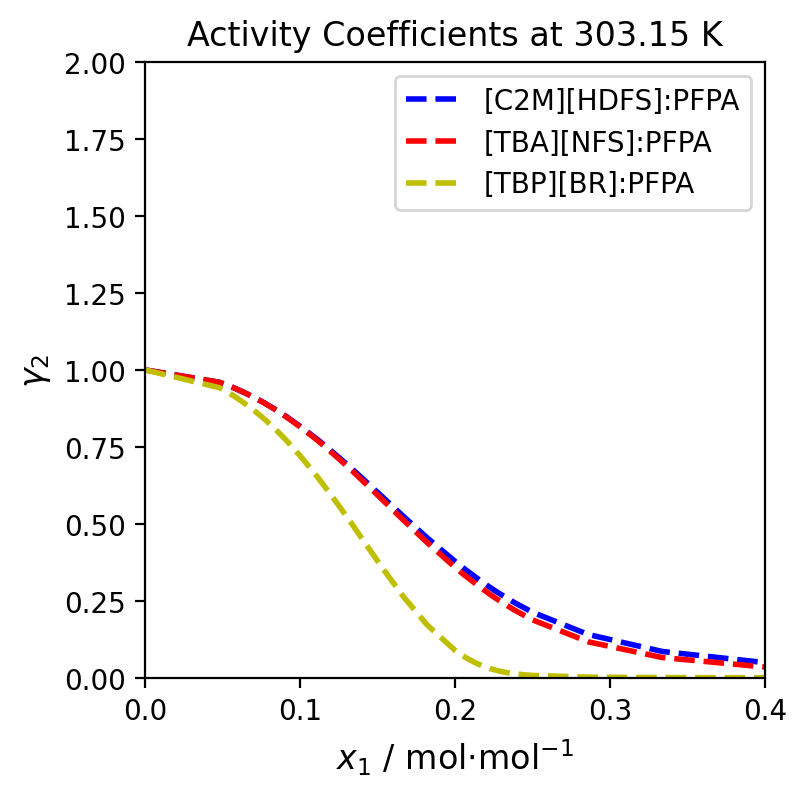

In [4]:
des_ndxs = ['[C2M][HDFS]:PFPA', '[TBA][NFS]:PFPA', '[TBP][BR]:PFPA']
des_inps = ['c2mim_hdfs_pfpa', 'tba_nfs_pfpa', 'tbp_br_pfpa']
colors = ['b', 'r', 'y']

plt.figure(figsize=(4,4), dpi=200)
for i,ndx in enumerate(des_ndxs):
    inp_str = 'activity_coefficients/raw/'+des_inps[i]+'/ActivityCoefficients-'+param_str+'.tab'
    COSMO_data = ReadCOSMOthermGamma(inp_str)
    x1, gamma = COSMO_data[(303.15)][0], COSMO_data[(303.15)][1]
    x1, gamma = np.array(x1)*2, np.array(gamma)
    x1, gamma = np.append(x1, 0), np.append(gamma, 1)
    sort_ndx = np.argsort(x1)
    x1, gamma = x1[sort_ndx], gamma[sort_ndx]
    plt.plot(x1, gamma, '--'+colors[i], mfc='none', ms=5, lw=2, label=ndx)
    plt.xlim(0, .4), plt.ylim(0, 2)
    plt.xlabel(r'$x_1$ / mol$\cdot$mol$^{-1}$', fontsize=12), plt.ylabel(r'$\gamma_2$', fontsize=12)
    plt.xticks(fontsize=10), plt.yticks(fontsize=10)
    plt.title('Activity Coefficients at %.2f K' %(T), fontsize=12)
    plt.legend()
    np.savetxt('activity_coefficients/'+des_inps[i]+'.out', np.array([x1, gamma]).T, header='x1\tgamma2', fmt='%.8f')
plt.show()